In [9]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [4]:
pretrain_res = json.load(open("pretrain_res.json", "r"))

In [23]:
input_std_0 = []
input_0 = []
input_1 = []

for k, v in pretrain_res.items():
    input_name = v["config"]["input_name"]
    interval_skip = v["config"]["interval_skip"]
    
    if input_name == "input_std" and interval_skip == 0:
        input_std_0.append(k)
    elif input_name == "input" and interval_skip == 0:
        input_0.append(k)
    elif input_name == "input" and interval_skip == 1:
        input_1.append(k)

In [24]:
model_mapper = {"baseline": "Conv3D", "unipose": "bi-ConvLSTM", "deciwatch": "Transformer"}

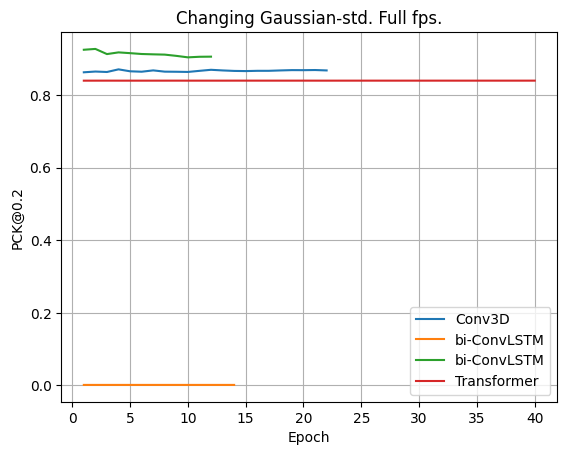

In [17]:
plt.figure()
for model_name in input_std_0:
    train_losses = pretrain_res[model_name]["val_accs"]
    x = np.arange(1, len(train_losses) + 1)
    
    model_type = model_name.split("_")[0]
    
    plt.plot(x, train_losses, label=model_mapper[model_type])
    
plt.grid()
plt.legend()
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.title("Changing Gaussian-std. Full fps.")
plt.show()

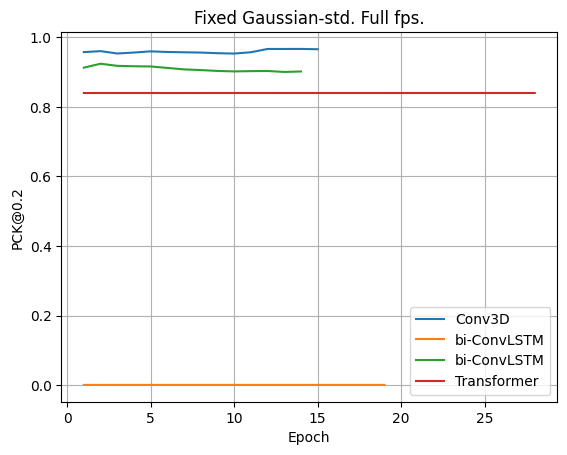

In [19]:
plt.figure()
for model_name in input_0:
    train_losses = pretrain_res[model_name]["val_accs"]
    x = np.arange(1, len(train_losses) + 1)
    
    model_type = model_name.split("_")[0]
    
    plt.plot(x, train_losses, label=model_mapper[model_type])
    
plt.grid()
plt.legend()
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.title("Fixed Gaussian-std. Full fps.")
plt.show()

baseline_1682171933.5215104
unipose_1682171933.5022376
unipose_1682171947.622883
deciwatch_1682177204.115201


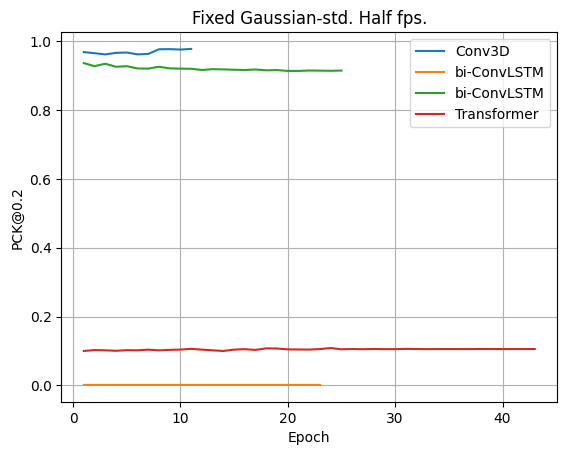

In [27]:
plt.figure()
for model_name in input_1:
    print(model_name)
    train_losses = pretrain_res[model_name]["val_accs"]
    x = np.arange(1, len(train_losses) + 1)
    
    model_type = model_name.split("_")[0]
    
    plt.plot(x, train_losses, label=model_mapper[model_type])
    
plt.grid()
plt.legend()
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.title("Fixed Gaussian-std. Half fps.")
plt.show()